In [1]:
import numpy as np
import  matplotlib.pyplot as plt
from sklearn.metrics import r2_score
np.random.seed(424)

In [2]:
x = np.linspace(0, 20)
y = -1*x + 2

In [3]:
y = y.reshape(len(y), 1)
X = np.c_[np.ones(x.shape[0]).reshape(x.shape[0]), x]
theta = np.random.rand(X.shape[1], 1)

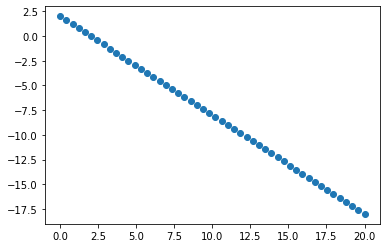

In [4]:
plt.scatter(x,y)

In [5]:
def compute_hypothesis(theta, x):
    return x @ theta

def compute_cost(theta, x, y):
    m = len(y)
    y_predict = compute_hypothesis(theta, x)
    return (1 / 2*m) * np.sum(np.square(y_predict - y))

def compute_gradient(theta, x, y):
    m = len(y)
    y_predict = compute_hypothesis(theta, x)
    return (1 / m) * (x.T @ (y_predict - y))

def plots(theta, X, x, y, theta_history, cost_history, hypothesis_history):
    plt.title("All Possible Lines")
    for i in range(len(hypothesis_history)):
        plt.plot(x, hypothesis_history[i], alpha=0.2)
        
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))
    axs[0,0].title.set_text("Best Fit Line")
    axs[0,0].plot(x, compute_hypothesis(theta, X), c='r')
    axs[0,0].scatter(x, y)

    axs[0,1].set_xlabel("Iterations")
    axs[0,1].set_ylabel("Cost Function")
    axs[0,1].plot(cost_history, marker='o', linestyle="dashed")

    axs[1,0].set_xlabel("Weight 0")
    axs[1,0].set_ylabel("Cost")
    axs[1,0].plot(np.array(theta_history)[:, 0] , cost_history[:] , marker="o", linestyle="dashed")


    axs[1,1].set_xlabel("Weight 1")
    axs[1,1].set_ylabel("Cost")
    axs[1,1].plot(np.array(theta_history)[:, 1] , cost_history[:] , marker="o", linestyle="dashed")

## Adagrad

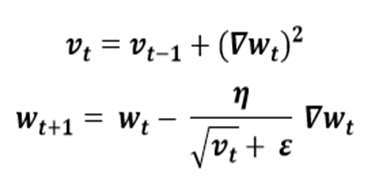

In [6]:
def adagrad(x, y, 
            learning_rate=0.001, epsilon=0.001, max_iterations=1000, 
            batch_size=x.shape[0]):
    
    theta = np.random.rand(X.shape[1], 1)
    v = 0
    cost_history = []
    theta_history = []
    hypothesis_history = []
    gradient = compute_gradient(theta, x, y)
    counter = 0
    no_of_batches = x.shape[0] // batch_size
    index = [*range(0, x.shape[0] + 1, batch_size)]
    
    while counter < max_iterations and np.linalg.norm(gradient, 1) >= 0.01:
        for i in range(no_of_batches):
            x_ith_batch =  x[index[i] : index[i+1]] 
            y_ith_batch =  y[index[i] : index[i+1]]
            
            gradient = compute_gradient(theta, x_ith_batch, y_ith_batch)
            v += gradient ** 2 
            theta -= (learning_rate / (v ** 0.5) + epsilon) * gradient

            theta_history.append([theta[0, 0], theta[1, 0]])
            cost_history.append(compute_cost(theta, x_ith_batch, y_ith_batch))
            hypothesis_history.append(compute_hypothesis(theta, x_ith_batch))
            counter += 1
    
    return theta, theta_history, cost_history, counter, hypothesis_history

##### First Trial with default parameters:

In [7]:
theta1, theta_history1, cost_history1, counter1, hypothesis_history1 = adagrad(X, y)

In [8]:
y_pred1 = compute_hypothesis(theta1, X)

In [9]:
r2_score(y, y_pred1)

0.9850758585187023

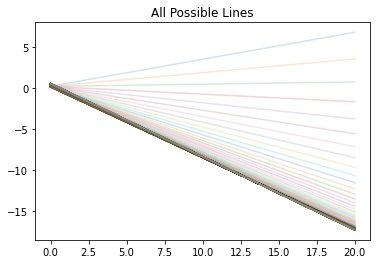

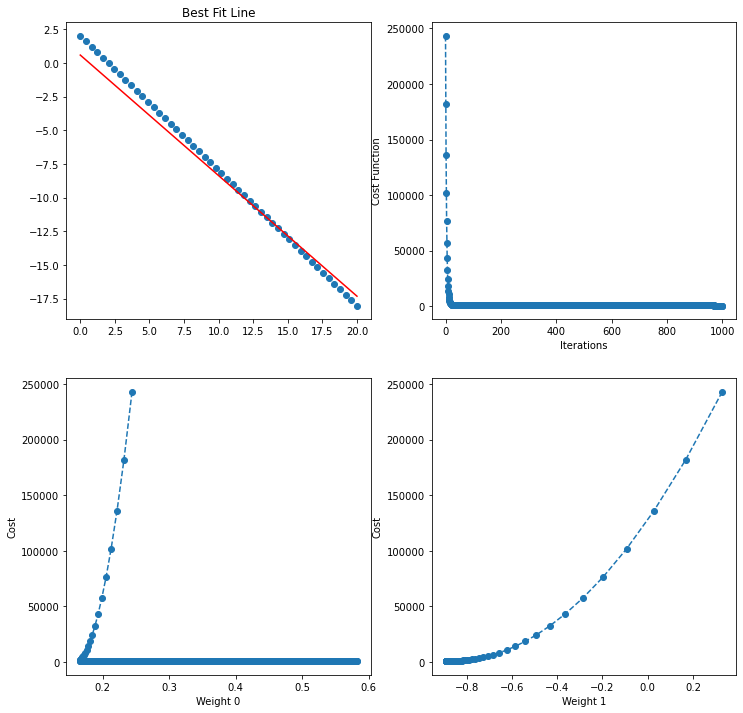

In [10]:
plots(theta1, X, x, y, theta_history1, cost_history1, hypothesis_history1)

##### Second Trial:

In [11]:
theta1s, theta_history1s, cost_history1s, counter1s, hypothesis_history1s = adagrad(X, y, learning_rate=0.1, epsilon=0.0001)

In [13]:
y_pred1s = compute_hypothesis(theta1s, X)

In [14]:
r2_score(y, y_pred1s)

0.9902067888433347

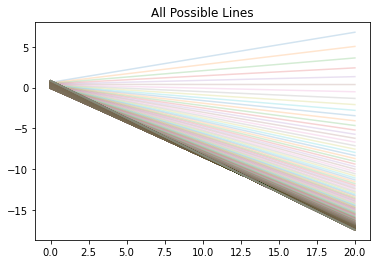

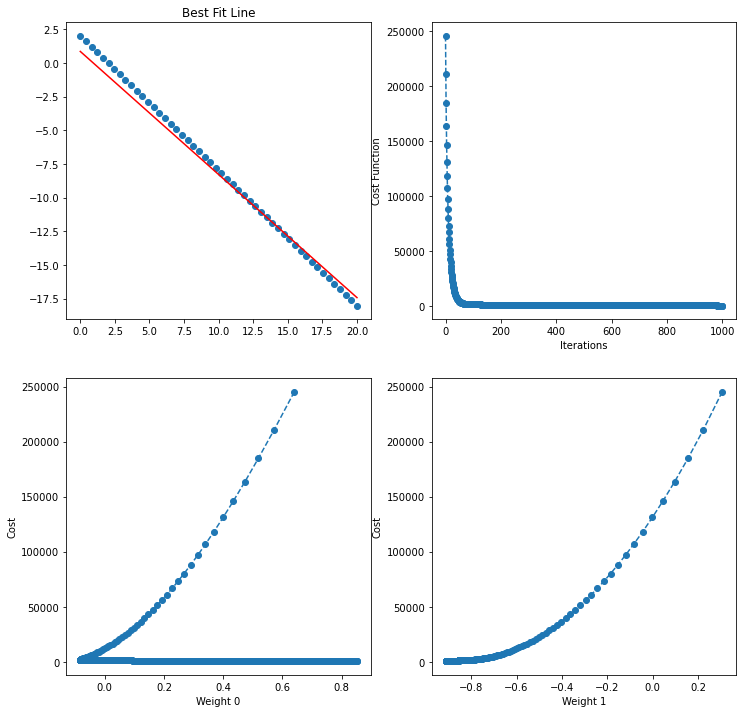

In [15]:
plots(theta1s, X, x, y, theta_history1s, cost_history1s, hypothesis_history1s)

---
## RMSProp

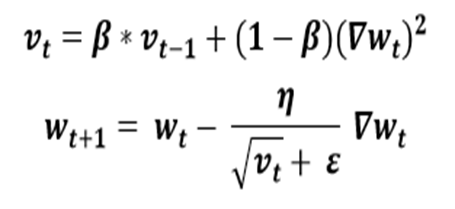

In [16]:
def RMSProp(x, y, 
            learning_rate=0.001, epsilon=0.0001, max_iterations=1000, beta=0.9,
            batch_size=x.shape[0]):
    
    theta = np.random.rand(X.shape[1], 1)
    v = 0
    cost_history = []
    theta_history = []
    hypothesis_history = []
    gradient = compute_gradient(theta, x, y)
    counter = 0
    no_of_batches = x.shape[0] // batch_size
    index = [*range(0, x.shape[0] + 1, batch_size)]
    
    while counter < max_iterations and np.linalg.norm(gradient, 1) >= 0.01:
        for i in range(no_of_batches):
            x_ith_batch =  x[index[i] : index[i+1]] 
            y_ith_batch =  y[index[i] : index[i+1]]
            
            gradient = compute_gradient(theta, x_ith_batch, y_ith_batch)
            v = beta * v + (1 - beta) * gradient ** 2 
            theta -= (learning_rate / (v ** 0.5) + epsilon) * gradient

            theta_history.append([theta[0, 0], theta[1, 0]])
            cost_history.append(compute_cost(theta, x_ith_batch, y_ith_batch))
            hypothesis_history.append(compute_hypothesis(theta, x_ith_batch))
            counter += 1
    
    return theta, theta_history, cost_history, counter, hypothesis_history

##### First Trail with default parameters:

In [17]:
theta2, theta_history2, cost_history2, counter2, hypothesis_history2 = RMSProp(X, y)

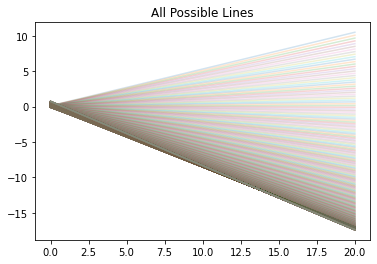

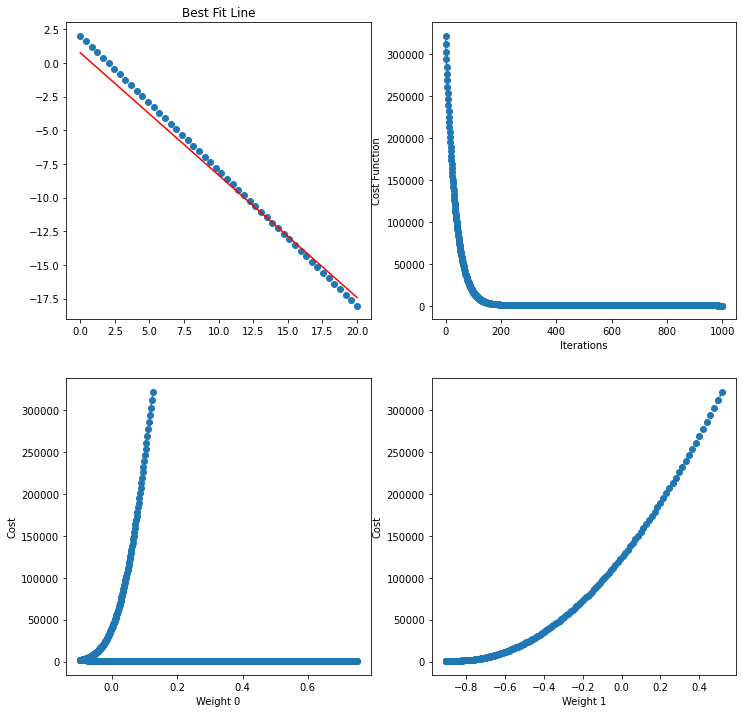

In [18]:
plots(theta2, X, x, y, theta_history2, cost_history2, hypothesis_history2)

In [19]:
y_pred2 = compute_hypothesis(theta2, X)
r2_score(y, y_pred2)

0.9884063989323014

##### Second Trial:

In [20]:
theta2s, theta_history2s, cost_history2s, counter2s, hypothesis_history2s = RMSProp(X, y, learning_rate=0.01, beta=0.7)

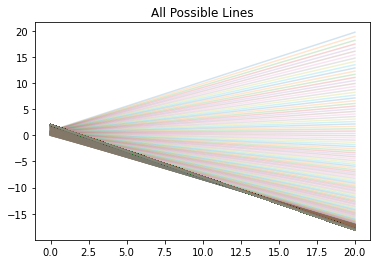

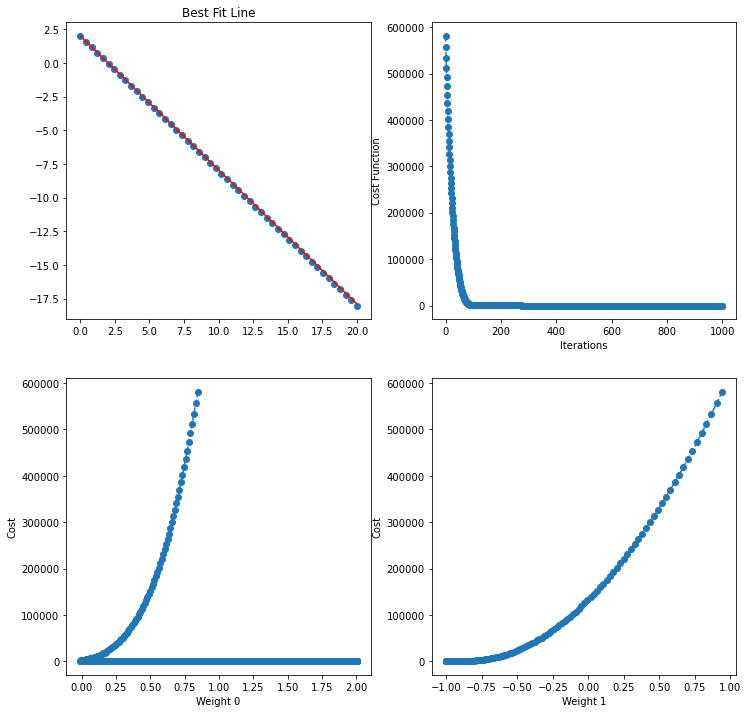

In [21]:
plots(theta2s, X, x, y, theta_history2s, cost_history2s, hypothesis_history2s)

In [22]:
y_pred2s = compute_hypothesis(theta2s, X)
r2_score(y, y_pred2s)

0.9998862759044991

---
## Adam

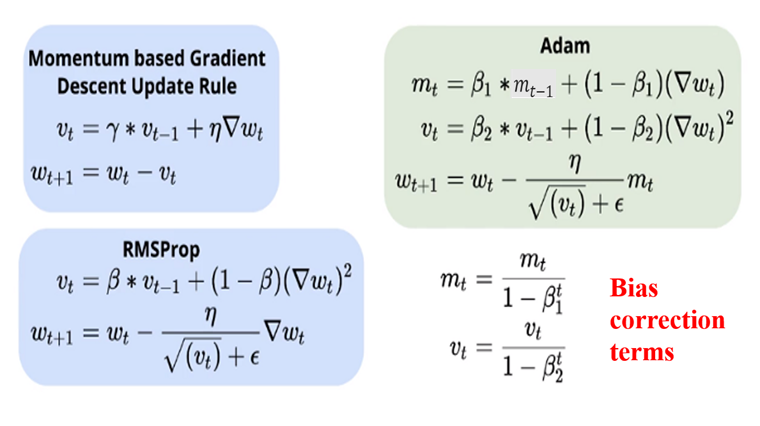

In [23]:
def adam(x, y, 
        learning_rate=0.001, epsilon=0.0001, max_iterations=1000, beta1=0.9, beta2=0.9,
        batch_size=x.shape[0]):
    
    theta = np.random.rand(X.shape[1], 1)
    v = 0
    m = 0
    cost_history = []
    theta_history = []
    hypothesis_history = []
    gradient = compute_gradient(theta, x, y)
    counter = 1
    no_of_batches = x.shape[0] // batch_size
    index = [*range(0, x.shape[0] + 1, batch_size)]
    
    while counter < max_iterations and np.linalg.norm(gradient, 1) >= 0.01:
        counter += 1
        for i in range(no_of_batches):
            x_ith_batch =  x[index[i] : index[i+1]] 
            y_ith_batch =  y[index[i] : index[i+1]]
            
            gradient = compute_gradient(theta, x_ith_batch, y_ith_batch)
            m = beta1 * m + (1 - beta1) * gradient
            v = beta2 * v + (1 - beta2) * gradient ** 2 
            
            m_hat = m / (1 - beta1 ** (counter))
            v_hat = v / (1 - beta2 ** (counter))
            
            theta -= (learning_rate / (v_hat ** 0.5) + epsilon) * m_hat

            theta_history.append([theta[0, 0], theta[1, 0]])
            cost_history.append(compute_cost(theta, x_ith_batch, y_ith_batch))
            hypothesis_history.append(compute_hypothesis(theta, x_ith_batch))
    
    return theta, theta_history, cost_history, counter, hypothesis_history

##### First Trial with default Parameters:

In [24]:
theta3, theta_history3, cost_history3, counter3, hypothesis_history3 = adam(X, y)

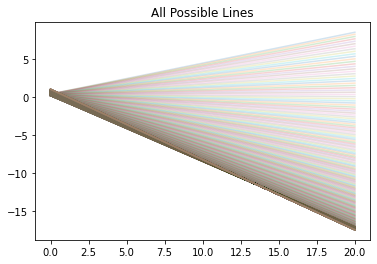

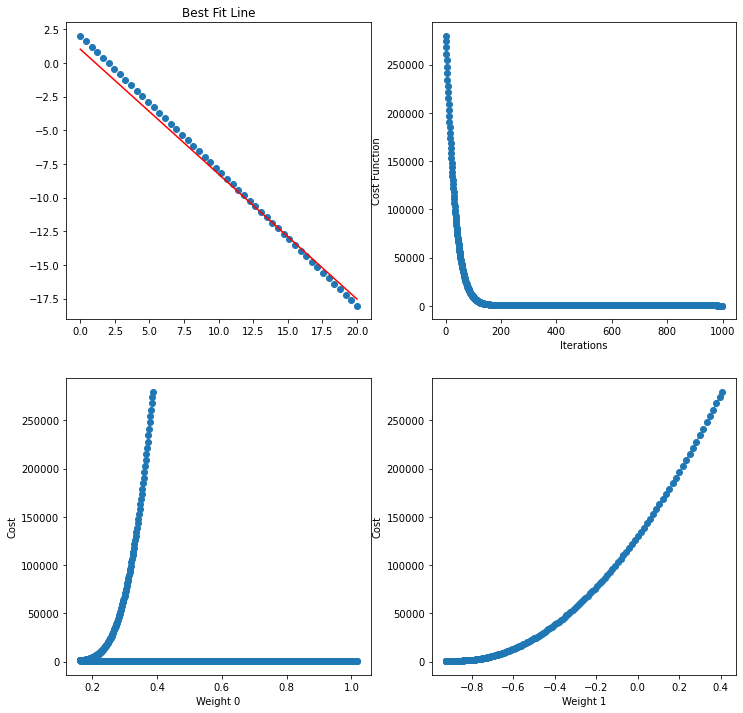

In [25]:
plots(theta3, X, x, y, theta_history3, cost_history3, hypothesis_history3)

In [26]:
y_pred3 = compute_hypothesis(theta3, X)
r2_score(y, y_pred3)

0.992830173942948

##### Second Trial:

In [27]:
theta3s, theta_history3s, cost_history3s, counter3s, hypothesis_history3s = adam(X, y, learning_rate=0.01, beta1=0.7, beta2=0.7)

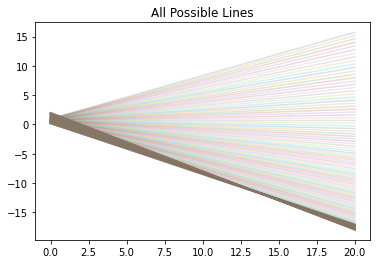

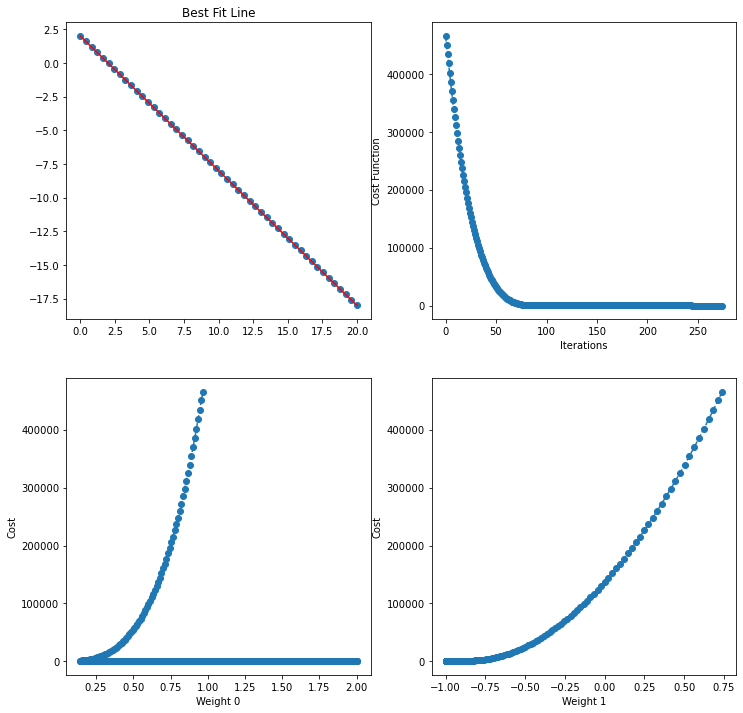

In [28]:
plots(theta3s, X, x, y, theta_history3s, cost_history3s, hypothesis_history3s)

In [29]:
y_pred3s = compute_hypothesis(theta3s, X)
r2_score(y, y_pred3s)

0.9999966609273901

---
### Comparisons:

In [37]:
theta_1, theta_history_1, cost_history_1, counter_1, hypothesis_history_1 = adagrad(X, y, learning_rate=0.01, epsilon=0.0001)
theta_2, theta_history_2, cost_history_2, counter_2, hypothesis_history_2 = RMSProp(X, y, learning_rate=0.01, epsilon=0.0001)
theta_3, theta_history_3, cost_history_3, counter_3, hypothesis_history_3 = adam(X, y, learning_rate=0.01, epsilon=0.0001)

In [38]:
print(f"""For AdaGrad, Accuracy: {r2_score(y, compute_hypothesis(theta_1, X))*100} 
For RMSProp, Accuracy: {r2_score(y, compute_hypothesis(theta_2, X))*100}
For Adam, Accuracy: {r2_score(y, compute_hypothesis(theta_2, X))*100}""")

For AdaGrad, Accuracy: 97.78730387282621 
For RMSProp, Accuracy: 99.98862759044991
For Adam, Accuracy: 99.98862759044991


(0.0, 1.0, 0.0, 1.0)

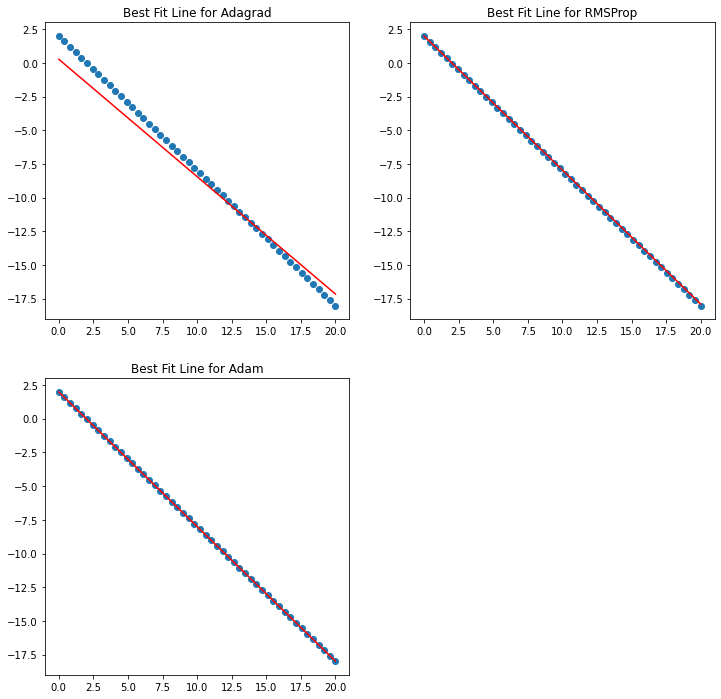

In [39]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs[0,0].title.set_text("Best Fit Line for Adagrad")
axs[0,0].plot(x, compute_hypothesis(theta_1, X), c='r')
axs[0,0].scatter(x, y)

axs[0,1].title.set_text("Best Fit Line for RMSProp")
axs[0,1].plot(x, compute_hypothesis(theta_2, X), c='r')
axs[0,1].scatter(x, y)

axs[1,0].title.set_text("Best Fit Line for Adam")
axs[1,0].plot(x, compute_hypothesis(theta_3, X), c='r')
axs[1,0].scatter(x, y)


axs[1,1].axis("off")

(0.0, 1.0, 0.0, 1.0)

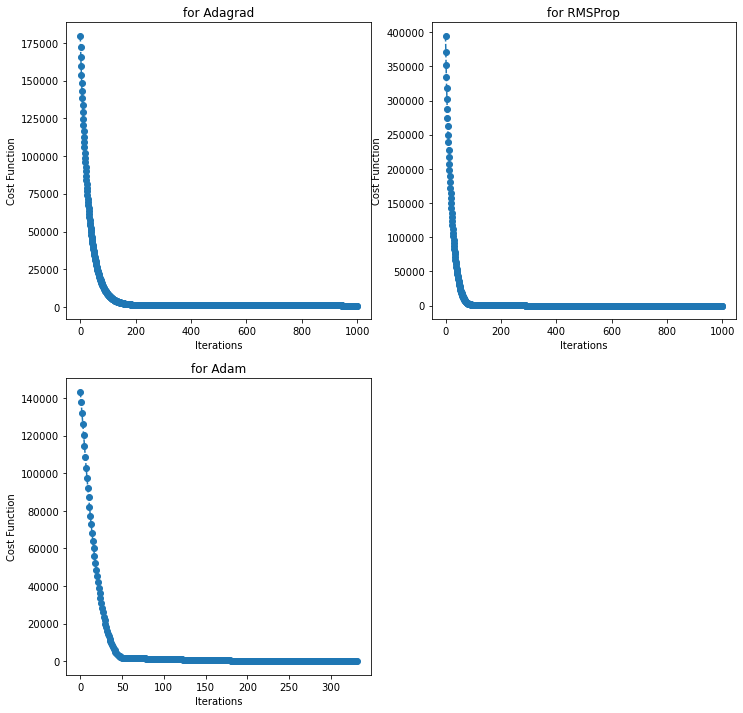

In [40]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs[0,0].title.set_text("for Adagrad")
axs[0,0].set_xlabel("Iterations")
axs[0,0].set_ylabel("Cost Function")
axs[0,0].plot(cost_history_1, marker='o', linestyle="dashed")

axs[0,1].title.set_text("for RMSProp")
axs[0,1].set_xlabel("Iterations")
axs[0,1].set_ylabel("Cost Function")
axs[0,1].plot(cost_history_2, marker='o', linestyle="dashed")

axs[1,0].title.set_text("for Adam")
axs[1,0].set_xlabel("Iterations")
axs[1,0].set_ylabel("Cost Function")
axs[1,0].plot(cost_history_3, marker='o', linestyle="dashed")

axs[1,1].axis("off")

(0.0, 1.0, 0.0, 1.0)

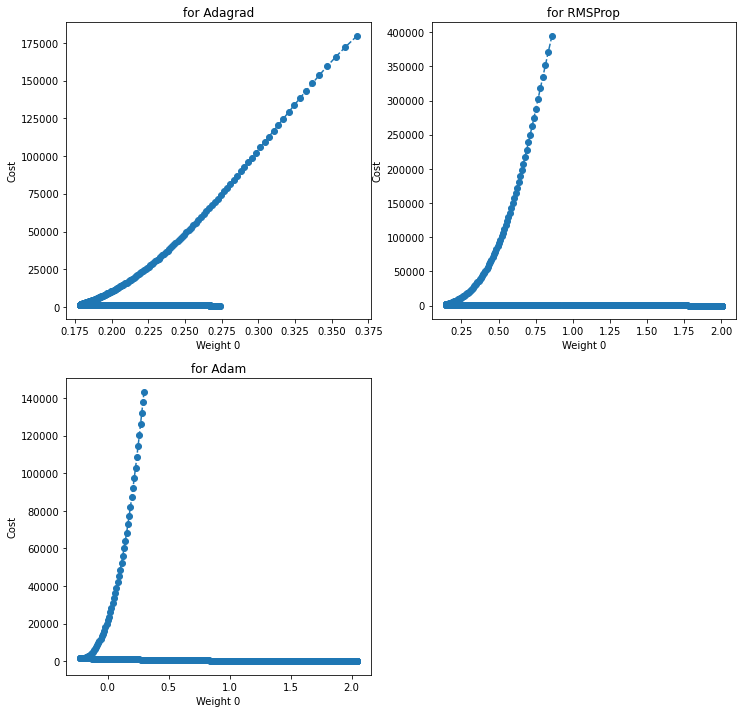

In [46]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0,0].title.set_text("for Adagrad")
axs[0,0].set_xlabel("Weight 0")
axs[0,0].set_ylabel("Cost")
axs[0,0].plot(np.array(theta_history_1)[:, 0] , cost_history_1[:] , marker="o", linestyle="dashed")

axs[0,1].title.set_text("for RMSProp")
axs[0,1].set_xlabel("Weight 0")
axs[0,1].set_ylabel("Cost")
axs[0,1].plot(np.array(theta_history_2)[:, 0] , cost_history_2[:] , marker="o", linestyle="dashed")

axs[1,0].title.set_text("for Adam")
axs[1,0].set_xlabel("Weight 0")
axs[1,0].set_ylabel("Cost")
axs[1,0].plot(np.array(theta_history_3)[:, 0] , cost_history_3[:] , marker="o", linestyle="dashed")
axs[1,1].axis("off")

(0.0, 1.0, 0.0, 1.0)

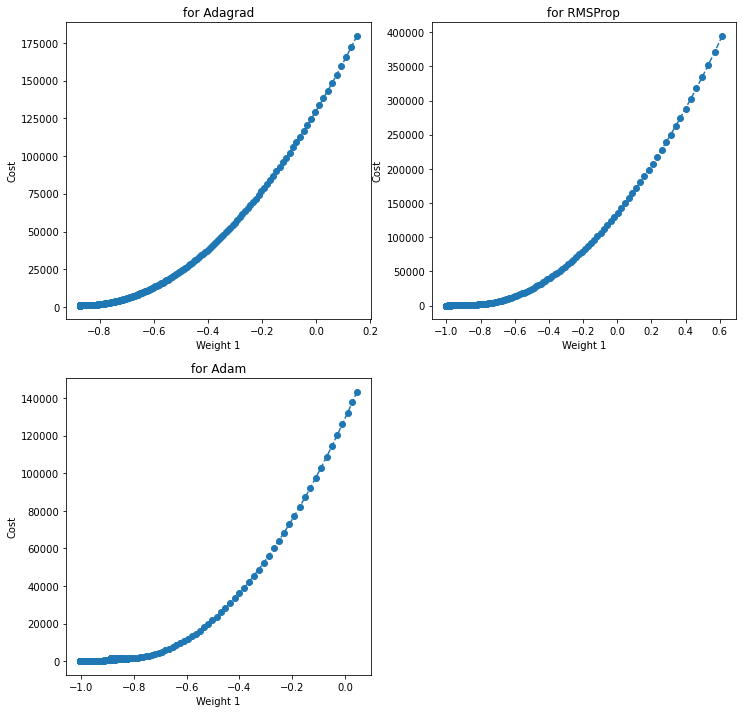

In [45]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0,0].title.set_text("for Adagrad")
axs[0,0].set_xlabel("Weight 1")
axs[0,0].set_ylabel("Cost")
axs[0,0].plot(np.array(theta_history_1)[:, 1] , cost_history_1[:] , marker="o", linestyle="dashed")

axs[0,1].title.set_text("for RMSProp")
axs[0,1].set_xlabel("Weight 1")
axs[0,1].set_ylabel("Cost")
axs[0,1].plot(np.array(theta_history_2)[:, 1] , cost_history_2[:] , marker="o", linestyle="dashed")

axs[1,0].title.set_text("for Adam")
axs[1,0].set_xlabel("Weight 1")
axs[1,0].set_ylabel("Cost")
axs[1,0].plot(np.array(theta_history_3)[:, 1] , cost_history_3[:] , marker="o", linestyle="dashed")

axs[1,1].axis("off")

(0.0, 1.0, 0.0, 1.0)

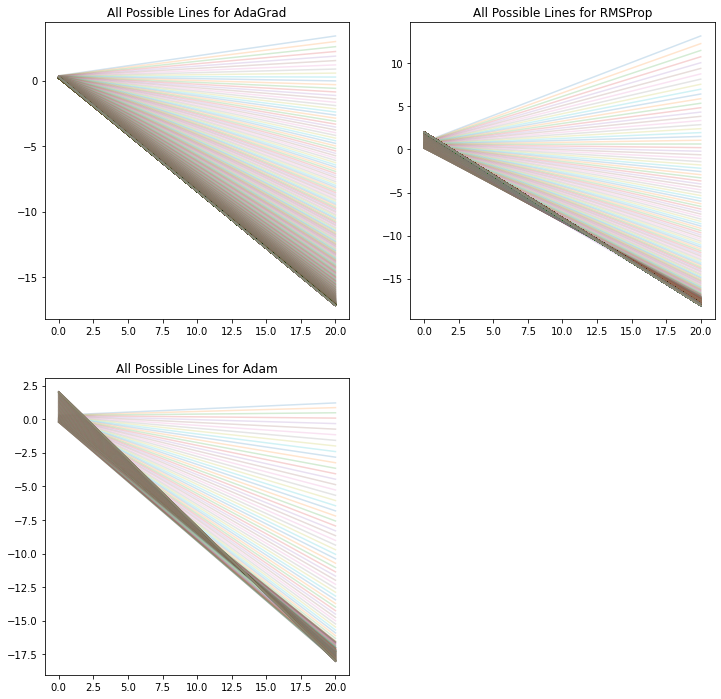

In [43]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0,0].title.set_text("All Possible Lines for AdaGrad")
for i in range(len(hypothesis_history_1)):
    axs[0,0].plot(x, hypothesis_history_1[i], alpha=0.2)
    
axs[0,1].title.set_text("All Possible Lines for RMSProp")
for i in range(len(hypothesis_history_2)):
    axs[0,1].plot(x, hypothesis_history_2[i], alpha=0.2)
    
axs[1,0].title.set_text("All Possible Lines for Adam")
for i in range(len(hypothesis_history_3)):
    axs[1,0].plot(x, hypothesis_history_3[i], alpha=0.2)

axs[1,1].axis("off")